# Car Damage Classification

### Contributed by -  Rishabh Shrivas


## Case Study Overview

In Car Insurance industry, a lot of money is being wasted on Claims leakage. Claims leakage is the gap between the optimal and actual settlement of a claim. Visual inspection and validation are being used to reduce claims leakage. But doing inspection might take a long time and result in delaying of claims processing. An automated system for doing inspection and validation will be of great help in speeding up the process.

## Business Use Case

To reduce Claims leakage, Visual inspection and validation are being done. This takes a long time and we are automating this procedure. Using this automation will result in processing of Claims faster.

## Mapping Real world problem to DL problem

   The Car damage dataset is comprised of 2300 images.Since we are trying to automate the Visual inspection and validation of vehicle damage and in input data all we have are images.
<p>This problem is a classic classification problem.<p>
We will be using Convolutional Neural Networks (CNN).
We are using CNN to predict whether the car has been damaged are not, Where the damage is and the severity of damage.

## Evaluation Metrics

In this we are using Accuracy, Precision, Recall as performance metrics.

To calculate Accuracy, Precision, Recall we need to calculate Confusion matrix.
1. From Confusion matrix we get True Positives(TP), True Negatives(TN), False Positives(FP), False Negatives(FN).
2. Accuracy is given by (TP+TN)/(TP+FP+TN+FN)
3. Precision is given by TP/(TP+FP)
4. Recall is given by TP/(TP+FN)

## Data Source and Overview 

1. Since the dataset for damage in cars are rare. 
2. The car dataset is downloaded from https://www.kaggle.com/anujms/car-damage-detection and https://drive.google.com/drive/folders/1cCOxtyycmNX8hZjmmre1qHSQU76G6hLR
3. This consists of Train and Validation which each folder has Damage cars pics and whole car pics. A total of 2300 images are present in both train and validation.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import random
from tqdm import tqdm
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

Using TensorFlow backend.


# EDA

We have three types of Datasets:
1. Training and Test folders of Car damaged, not damaged images.
2. Training and Test folders of Damage on Front, Rear, Side.
3. Training and Test folders of Damage severity Minor, Moderate, Severe.

### Data-1

In [2]:
train_damaged_list = os.listdir('drive_data/data1a/training/00-damage')

In [3]:
train_not_damaged_list = os.listdir('drive_data/data1a/training/01-whole')

In [4]:
test_damaged_list = os.listdir('drive_data/data1a/validation/00-damage')

In [5]:
test_not_damaged_list = os.listdir('drive_data/data1a/validation/01-whole')

In [6]:
def plot_bar(class_labels,counts,name):
    plt.figure(figsize = (5,5))
    f = sns.barplot(x = classes,y =counts)
    plt.xlabel("Class labels", fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title("Number of Images in "+name+' folder', fontsize=15)
    plt.show()

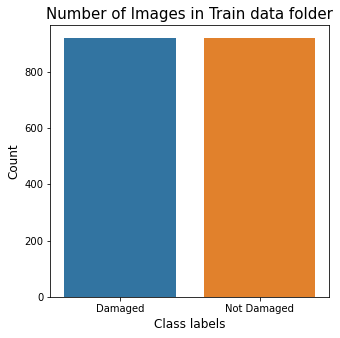

Number of Damaged images in train is 920
Number of Not Damaged images in train is 920


In [7]:
classes = ['Damaged','Not Damaged']
counts = [len(train_damaged_list),len(train_not_damaged_list)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train is '+str(counts[i]))

####  Observations:

1. From the train plot we can see that the images we have for Damaged and Not damaged classes are equal.
2. There is no class imbalance.
3. Since the dataset we have is less we can enlarge the dataset using Data Augmentation.

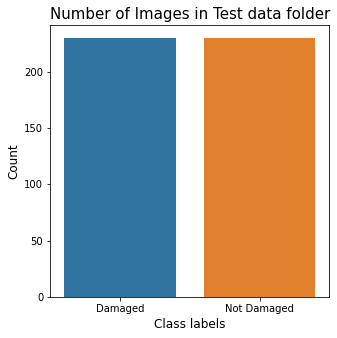

Number of Damaged images in test is 230
Number of Not Damaged images in test is 230


In [8]:
classes = ['Damaged','Not Damaged']
counts = [len(test_damaged_list),len(test_not_damaged_list)]
plot_bar(classes,counts,'Test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test is '+str(counts[i]))

####  Observations:

1. From the test plot we can see that the images we have for Damaged and Not damaged classes are equal.
2. Since the cars datasets are rare the test folder has less number of images.

In [9]:
def img_shapes(files,path):
    shapes = []
    for i in files:
        img = cv2.imread(path+'/'+i)
        shapes.append(img.shape)
    return shapes

In [10]:
train_dmg = img_shapes(train_damaged_list,'drive_data/data1a/training/00-damage')

In [11]:
train_no_dmg = img_shapes(train_not_damaged_list,'drive_data/data1a/training/01-whole')

In [12]:
train_df = pd.DataFrame(list(zip(train_dmg,train_no_dmg)),columns = classes)

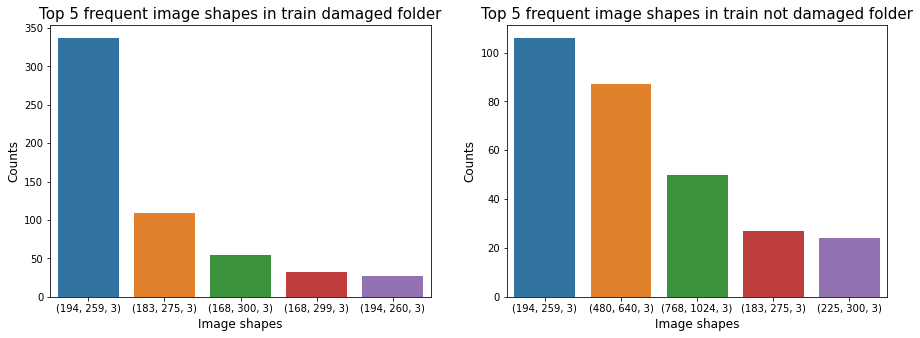

No of unique image shapes in train damaged are  132
No of unique image shapes in train not damaged are  385


In [13]:
#Damaged train
num = [str(i) for i in train_df['Damaged'].value_counts().index[:5]]
counts_val = [i for i in train_df['Damaged'].value_counts()[:5]]
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train damaged folder", fontsize=15)

#Not Damaged train
num = [str(i) for i in train_df['Not Damaged'].value_counts().index[:5]]
counts_val = [i for i in train_df['Not Damaged'].value_counts()[:5]]
plt.subplot(1,2,2)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train not damaged folder", fontsize=15)
plt.show()

print('No of unique image shapes in train damaged are ',len(train_df['Damaged'].unique()))
print('No of unique image shapes in train not damaged are ',len(train_df['Not Damaged'].unique()))

####  Observations:

1. From the above plot we can see that the (194,259) image shape are more abudant than others in damaged folder and not damaged folder.
2. But in not damaged folder the counts of images with (194,259) and (480,640) are almost equal.
3. There are 132 unique image shapes present in train damaged folder.
4. There are 385 unique image shapes present in train not damaged folder.

### Data - 2

In [14]:
train_front = os.listdir('drive_data/data2a/training/00-front')
train_rear = os.listdir('drive_data/data2a/training/01-rear')
train_side = os.listdir('drive_data/data2a/training/02-side')

In [15]:
test_front = os.listdir('drive_data/data2a/validation/00-front')
test_rear = os.listdir('drive_data/data2a/validation/01-rear')
test_side = os.listdir('drive_data/data2a/validation/02-side')

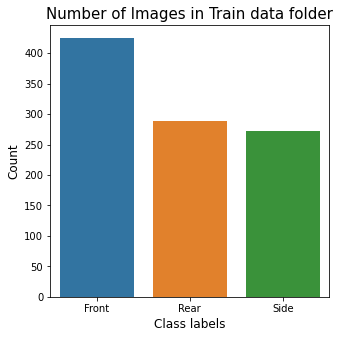

Number of Front images in train is 425
Number of Rear images in train is 288
Number of Side images in train is 272


In [16]:
classes = ['Front','Rear','Side']
counts = [len(train_front),len(train_rear),len(train_side)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train is '+str(counts[i]))

####  Observations:

1. From the train plot we can see that the images we have for Front, Rear and Side are not equal.
2. We have more front images and counts of rear and side are almost equal.
3. Since the dataset we have is less we can enlarge the dataset using Data Augmentation.

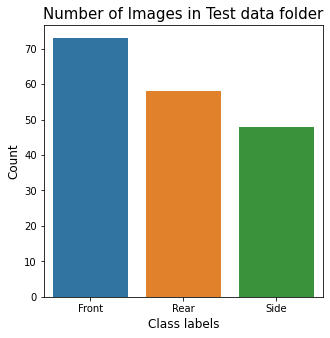

Number of Front images in test is 73
Number of Rear images in test is 58
Number of Side images in test is 48


In [17]:
classes = ['Front','Rear','Side']
counts = [len(test_front),len(test_rear),len(test_side)]
plot_bar(classes,counts,'Test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test is '+str(counts[i]))

####  Observations:

1. From the test plot we can see that the images we have for front, rear and side classes are not equal.
2. Since the cars datasets are rare the test folder has less number of images.

In [18]:
train_front_shape = img_shapes(train_front,'drive_data/data2a/training/00-front')

In [19]:
train_rear_shape = img_shapes(train_rear,'drive_data/data2a/training/01-rear')

In [20]:
train_side_shape = img_shapes(train_side,'drive_data/data2a/training/02-side')

In [21]:
train_df = pd.DataFrame(list(zip(train_front_shape,train_rear_shape,train_side_shape)),columns = classes)

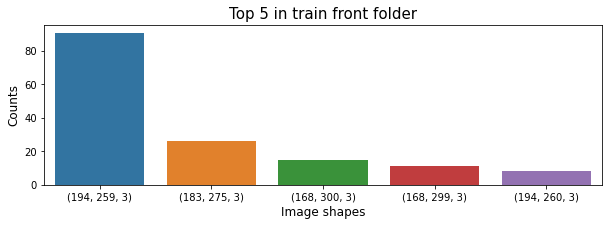

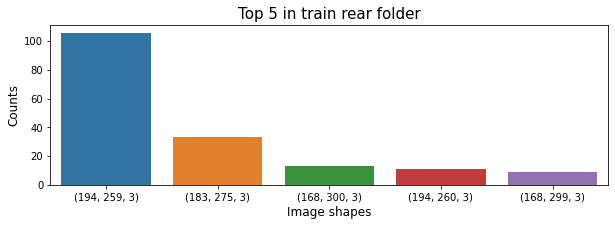

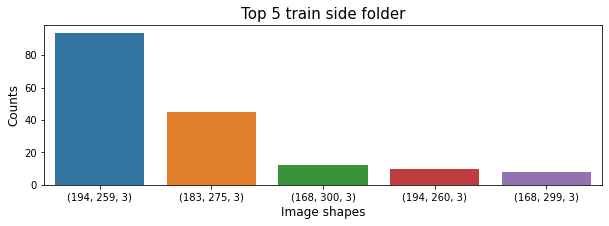

No of unique image shapes in train front are  70
No of unique image shapes in train rear are  67
No of unique image shapes in train side are  60


In [22]:
#Front train
num = [str(i) for i in train_df['Front'].value_counts().index[:5]]
counts_val = [i for i in train_df['Front'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train front folder", fontsize=15)

#Rear train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Rear'].value_counts().index[:5]]
counts_val = [i for i in train_df['Rear'].value_counts()[:5]]
plt.subplot(3,1,2)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train rear folder", fontsize=15)
plt.show()

#Side train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Side'].value_counts().index[:5]]
counts_val = [i for i in train_df['Side'].value_counts()[:5]]
plt.subplot(3,1,3)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 train side folder", fontsize=15)
plt.show()


print('No of unique image shapes in train front are ',len(train_df['Front'].unique()))
print('No of unique image shapes in train rear are ',len(train_df['Rear'].unique()))
print('No of unique image shapes in train side are ',len(train_df['Side'].unique()))

####  Observations:

1. From the above plot we can see that the (194,259) image shape are more abudant in all classes.
2. There are 70 unique image shapes present in train front folder.
3. There are 67 unique image shapes present in train rear folder.
4. There are 60 unique image shapes present in train side folder.

### Data -3

In [23]:
train_minor = os.listdir('drive_data/data3a/training/01-minor')
train_moderate = os.listdir('drive_data/data3a/training/02-moderate')
train_severe = os.listdir('drive_data/data3a/training/03-severe')

In [24]:
test_minor = os.listdir('drive_data/data3a/validation/01-minor')
test_moderate = os.listdir('drive_data/data3a/validation/02-moderate')
test_severe = os.listdir('drive_data/data3a/validation/03-severe')

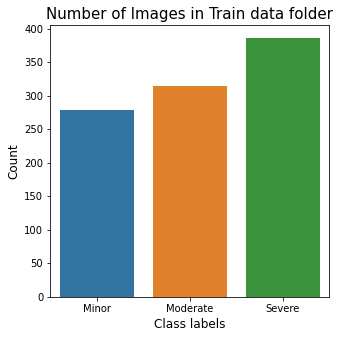

Number of Minor images in train is 278
Number of Moderate images in train is 315
Number of Severe images in train is 386


In [25]:
classes = ['Minor','Moderate','Severe']
counts = [len(train_minor),len(train_moderate),len(train_severe)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train is '+str(counts[i]))

####  Observations:

1. From the train plot we can see that the images we have for Minor, Moderate and Severe are not equal.
2. We have more Severe images and less images in minor.
3. Since the dataset we have is less we can enlarge the dataset using Data Augmentation.

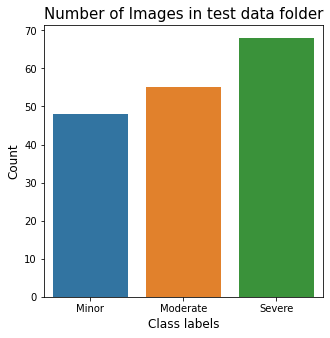

Number of Minor images in test is 48
Number of Moderate images in test is 55
Number of Severe images in test is 68


In [26]:
classes = ['Minor','Moderate','Severe']
counts = [len(test_minor),len(test_moderate),len(test_severe)]
plot_bar(classes,counts,'test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test is '+str(counts[i]))

####  Observations:

1. From the test plot we can see that the images we have for Minor, Moderate and Severe are not equal.
2. Since the cars datasets are rare the test folder has less number of images.

In [27]:
train_minor_shape = img_shapes(train_minor,'drive_data/data3a/training/01-minor')

In [28]:
train_moderate_shape = img_shapes(train_moderate,'drive_data/data3a/training/02-moderate')

In [29]:
train_severe_shape = img_shapes(train_severe,'drive_data/data3a/training/03-severe')

In [30]:
train_df = pd.DataFrame(list(zip(train_minor_shape,train_moderate_shape,train_severe_shape)),columns = classes)

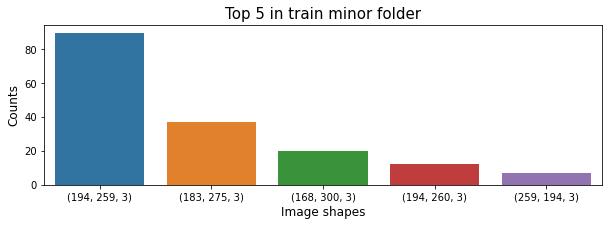

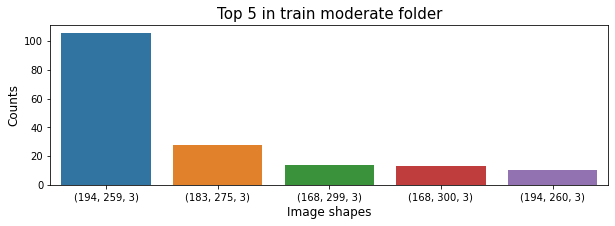

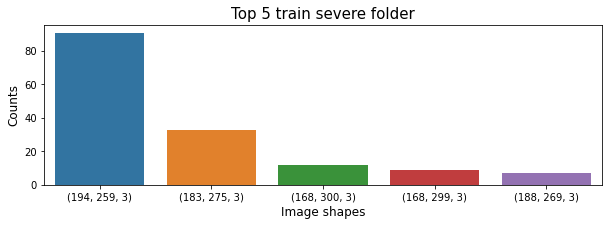

No of unique image shapes in train minor are  66
No of unique image shapes in train moderate are  63
No of unique image shapes in train severe are  70


In [31]:
#Front train
num = [str(i) for i in train_df['Minor'].value_counts().index[:5]]
counts_val = [i for i in train_df['Minor'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train minor folder", fontsize=15)

#Rear train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Moderate'].value_counts().index[:5]]
counts_val = [i for i in train_df['Moderate'].value_counts()[:5]]
plt.subplot(3,1,2)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train moderate folder", fontsize=15)
plt.show()

#Side train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Severe'].value_counts().index[:5]]
counts_val = [i for i in train_df['Severe'].value_counts()[:5]]
plt.subplot(3,1,3)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 train severe folder", fontsize=15)
plt.show()


print('No of unique image shapes in train minor are ',len(train_df['Minor'].unique()))
print('No of unique image shapes in train moderate are ',len(train_df['Moderate'].unique()))
print('No of unique image shapes in train severe are ',len(train_df['Severe'].unique()))

####  Observations:

1. From the above plot we can see that the (194,259) image shape are more abudant in all classes.
2. There are 66 unique image shapes present in train front folder.
3. There are 63 unique image shapes present in train rear folder.
4. There are 70 unique image shapes present in train side folder.

# Data without Augmentation

In this I am creating folders for original data without any augmentation.

In [32]:
lists = [['damaged','not_damaged'],['front','rear','side'],['minor','moderate','severe']]

In [33]:
data = ['data_1','data_2','data_3']

In [34]:
paths = []
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)
create_folders('data',lists,data)

In [35]:
#Saving images
def save_images(name,save_path,image_path):
    
    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)
    
    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

### Data-1

In [36]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data/data_1/train/damaged
data/data_1/train/not_damaged
data/data_1/test/damaged
data/data_1/test/not_damaged


In [37]:
for i in tqdm(train_damaged_list):
    save_images(i,train_save_path_1,'drive_data/data1a/training/00-damage')

100%|██████████| 920/920 [00:04<00:00, 200.24it/s]


In [38]:
for i in tqdm(train_not_damaged_list):
    save_images(i,train_save_path_2,'drive_data/data1a/training/01-whole')

100%|██████████| 920/920 [00:25<00:00, 35.41it/s]


In [39]:
for i in tqdm(test_damaged_list):
    save_images(i,test_save_path_1,'drive_data/data1a/validation/00-damage')

100%|██████████| 230/230 [00:02<00:00, 80.91it/s] 


In [40]:
for i in tqdm(test_not_damaged_list):
    save_images(i,test_save_path_2,'drive_data/data1a/validation/01-whole')

100%|██████████| 230/230 [00:07<00:00, 30.45it/s]


### Data-2

In [41]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data/data_2/train/front
data/data_2/train/rear
data/data_2/train/side
data/data_2/test/front
data/data_2/test/rear
data/data_2/test/side


In [42]:
for i in tqdm(train_front):
    save_images(i,train_save_path_1,'drive_data/data2a/training/00-front')

100%|██████████| 425/425 [00:02<00:00, 144.70it/s]


In [43]:
for i in tqdm(train_rear):
    save_images(i,train_save_path_2,'drive_data/data2a/training/01-rear')

100%|██████████| 288/288 [00:03<00:00, 76.77it/s] 


In [44]:
for i in tqdm(train_side):
    save_images(i,train_save_path_3,'drive_data/data2a/training/02-side')

100%|██████████| 272/272 [00:02<00:00, 92.91it/s] 


In [45]:
for i in tqdm(test_front):
    save_images(i,test_save_path_1,'drive_data/data2a/validation/00-front')

100%|██████████| 73/73 [00:02<00:00, 29.80it/s]


In [46]:
for i in tqdm(test_rear):
    save_images(i,test_save_path_2,'drive_data/data2a/validation/01-rear')

100%|██████████| 58/58 [00:02<00:00, 22.33it/s]


In [47]:
for i in tqdm(test_side):
    save_images(i,test_save_path_3,'drive_data/data2a/validation/02-side')

100%|██████████| 48/48 [00:02<00:00, 19.51it/s]


### Data-3

In [48]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data/data_3/train/minor
data/data_3/train/moderate
data/data_3/train/severe
data/data_3/test/minor
data/data_3/test/moderate
data/data_3/test/severe


In [49]:
for i in tqdm(train_minor):
    save_images(i,train_save_path_1,'drive_data/data3a/training/01-minor')

100%|██████████| 278/278 [00:01<00:00, 148.91it/s]


In [50]:
for i in tqdm(train_moderate):
    save_images(i,train_save_path_2,'drive_data/data3a/training/02-moderate')

100%|██████████| 315/315 [00:02<00:00, 148.59it/s]


In [51]:
for i in tqdm(train_severe):
    save_images(i,train_save_path_3,'drive_data/data3a/training/03-severe')

100%|██████████| 386/386 [00:02<00:00, 152.41it/s]


In [52]:
for i in tqdm(test_minor):
    save_images(i,test_save_path_1,'drive_data/data3a/validation/01-minor')

100%|██████████| 48/48 [00:02<00:00, 21.12it/s]


In [53]:
for i in tqdm(test_moderate):
    save_images(i,test_save_path_2,'drive_data/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:02<00:00, 21.49it/s]


In [54]:
for i in tqdm(test_severe):
    save_images(i,test_save_path_3,'drive_data/data3a/validation/03-severe')

100%|██████████| 68/68 [00:02<00:00, 31.24it/s]


# Data Augmentation

Since the data we have is less we can synthetically increase the dataset using Data augmentation.I will be using two types of data augmentation as shown below.
1. Enlarging the dataset twice using random rotation between -20 and 20 degrees and horizontal flip transformations.
2. Enlarging the dataset twice using random rotation between -20 and 20, shear-range of 0.2, zoom-range of 0.2 and horizontal-flip.

## Data Augmentation - 1

In this we will use the first type of augmentation and we will visualize for a single image. In this we will create 1 new images for a each image in our data. So the data will enlarge by 2 times.

In [55]:
lists = [['damaged','not_damaged'],['front','rear','side'],['minor','moderate','severe']]

In [56]:
data = ['data_1','data_2','data_3']

In [57]:
paths = []
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)
create_folders('data_augmentation_1',lists,data)

## Data 1

### Visualization

In [64]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_damaged_list)

In [65]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [66]:
augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)

In [67]:
sample_img = image.load_img('drive_data/data1a/training/00-damage'+'/'+sample_file)

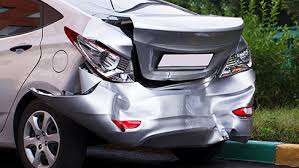

In [68]:
sample_img

In [69]:
sample_img_array = image.img_to_array(sample_img)

In [70]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [71]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False)
    samples.append(img_save)

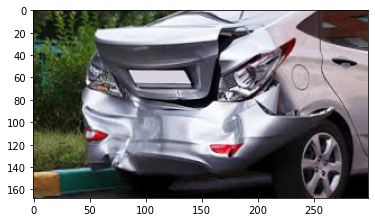

In [72]:
plt.imshow(samples[0])

### Generating images and saving in folders

We will be using Validation data in test data. For test data we will be not doing any data augmentation. So we will save these images directly to the folder.

In [73]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data_augmentation_1/data_1/train/damaged
data_augmentation_1/data_1/train/not_damaged
data_augmentation_1/data_1/test/damaged
data_augmentation_1/data_1/test/not_damaged


In [74]:
#Creating a function to create images
def create_images(name,save_path,image_path):
    #Generating a random number for rotation
    rotation = random.randint(-20,20)
    #Creating Image Data Generator:
    augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)
    
    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)
    
    #Saving original image to folder.
    image_org.save(save_path+'/'+name)
    
    #Getting the numpy array of image.
    image_arr = image.img_to_array(image_org)
    
    #Expanding dimensions of image array
    image_arr = image_arr.reshape((1,) + image_arr.shape)
    
    #Using Flow to generate 2 new images for single image
    for arr,val in zip(augmentation.flow(image_arr, batch_size=1, save_format='jpeg'),range(1)):
        name = name.split('.')[0]
        img_save = image.array_to_img(arr[0], scale=False)
        img_save.save(save_path+'/'+name+'_aug_'+str(val)+'.jpeg')
    return paths

In [75]:
#Saving images
def save_images(name,save_path,image_path):
    
    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)
    
    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

In [76]:
for i in tqdm(train_damaged_list):
    create_images(i,train_save_path_1,'drive_data/data1a/training/00-damage')

100%|██████████| 920/920 [00:35<00:00, 25.73it/s]


In [77]:
for i in tqdm(train_not_damaged_list):
    create_images(i,train_save_path_2,'drive_data/data1a/training/01-whole')

100%|██████████| 920/920 [03:16<00:00,  4.68it/s]


In [78]:
for i in tqdm(test_damaged_list):
    save_images(i,test_save_path_1,'drive_data/data1a/validation/00-damage')

100%|██████████| 230/230 [00:01<00:00, 197.74it/s]


In [79]:
for i in tqdm(test_not_damaged_list):
    save_images(i,test_save_path_2,'drive_data/data1a/validation/01-whole')

100%|██████████| 230/230 [00:05<00:00, 45.10it/s]


### Data -2

### Visualization

In [80]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_front)

In [81]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [82]:
augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)

In [83]:
sample_img = image.load_img('drive_data/data2a/training/00-front'+'/'+sample_file)

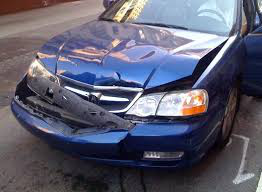

In [84]:
sample_img

In [85]:
sample_img_array = image.img_to_array(sample_img)

In [86]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [87]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

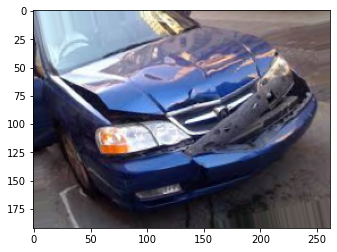

In [88]:
plt.imshow(samples[0])

### Generating images and saving in folders

We will be using Validation data in test data. For test data we will be not doing any data augmentation. So we will save these images directly to the folder.

In [89]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_1/data_2/train/front
data_augmentation_1/data_2/train/rear
data_augmentation_1/data_2/train/side
data_augmentation_1/data_2/test/front
data_augmentation_1/data_2/test/rear
data_augmentation_1/data_2/test/side


In [90]:
for i in tqdm(train_front):
    create_images(i,train_save_path_1,'drive_data/data2a/training/00-front')

100%|██████████| 425/425 [00:14<00:00, 28.97it/s]


In [91]:
for i in tqdm(train_rear):
    create_images(i,train_save_path_2,'drive_data/data2a/training/01-rear')

100%|██████████| 288/288 [00:09<00:00, 29.57it/s]


In [92]:
for i in tqdm(train_side):
    create_images(i,train_save_path_3,'drive_data/data2a/training/02-side')

100%|██████████| 272/272 [00:09<00:00, 27.67it/s]


In [93]:
for i in tqdm(test_front):
    save_images(i,test_save_path_1,'drive_data/data2a/validation/00-front')

100%|██████████| 73/73 [00:00<00:00, 147.00it/s]


In [94]:
for i in tqdm(test_rear):
    save_images(i,test_save_path_2,'drive_data/data2a/validation/01-rear')

100%|██████████| 58/58 [00:00<00:00, 167.11it/s]


In [95]:
for i in tqdm(test_side):
    save_images(i,test_save_path_3,'drive_data/data2a/validation/02-side')

100%|██████████| 48/48 [00:00<00:00, 183.70it/s]


### Data -3

### Visualization

In [96]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_severe)

In [97]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [98]:
augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)

In [99]:
sample_img = image.load_img('drive_data/data3a/training/03-severe'+'/'+sample_file)

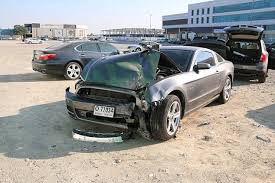

In [100]:
sample_img

In [101]:
sample_img_array = image.img_to_array(sample_img)

In [102]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [107]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

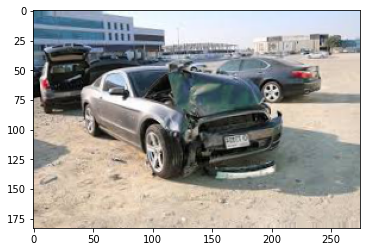

In [108]:
plt.imshow(samples[0])

### Generating images and saving in folders

We will be using Validation data in test data. For test data we will be not doing any data augmentation. So we will save these images directly to the folder.

In [109]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_1/data_3/train/minor
data_augmentation_1/data_3/train/moderate
data_augmentation_1/data_3/train/severe
data_augmentation_1/data_3/test/minor
data_augmentation_1/data_3/test/moderate
data_augmentation_1/data_3/test/severe


In [110]:
for i in tqdm(train_minor):
    create_images(i,train_save_path_1,'drive_data/data3a/training/01-minor')

100%|██████████| 278/278 [00:10<00:00, 27.55it/s]


In [111]:
for i in tqdm(train_moderate):
    create_images(i,train_save_path_2,'drive_data/data3a/training/02-moderate')

100%|██████████| 315/315 [00:12<00:00, 25.41it/s]


In [112]:
for i in tqdm(train_severe):
    create_images(i,train_save_path_3,'drive_data/data3a/training/03-severe')

100%|██████████| 386/386 [00:12<00:00, 29.75it/s]


In [113]:
for i in tqdm(test_minor):
    save_images(i,test_save_path_1,'drive_data/data3a/validation/01-minor')

100%|██████████| 48/48 [00:00<00:00, 149.77it/s]


In [114]:
for i in tqdm(test_moderate):
    save_images(i,test_save_path_2,'drive_data/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:00<00:00, 144.31it/s]


In [115]:
for i in tqdm(test_severe):
    save_images(i,test_save_path_3,'drive_data/data3a/validation/03-severe')

100%|██████████| 68/68 [00:00<00:00, 133.00it/s]


### Files Counts after Augmentation:

In [116]:
data_1_files = len(os.listdir('data_augmentation_1/data_1/train/damaged'))+len(os.listdir('data_augmentation_1/data_1/train/not_damaged'))

In [117]:
print('Number of files for all classes damaged, not damaged is ',data_1_files)

Number of files for all classes damaged, not damaged is  3680


In [118]:
data_2_files = len(os.listdir('data_augmentation_1/data_2/train/front'))+len(os.listdir('data_augmentation_1/data_2/train/rear'))+len(os.listdir('data_augmentation_1/data_2/train/side'))

In [119]:
print('Number of files for all classes front,rear,side is ',data_2_files)

Number of files for all classes front,rear,side is  1970


In [120]:
data_3_files = len(os.listdir('data_augmentation_1/data_3/train/minor'))+len(os.listdir('data_augmentation_1/data_3/train/moderate'))+len(os.listdir('data_augmentation_1/data_3/train/severe'))

In [121]:
print('Number of files for all classes minor,moderate,severe is ',data_3_files)

Number of files for all classes minor,moderate,severe is  1958


## Data Augmentation - 2

In this we will use the second type of augmentation and we will visualize for a single image. In this we will create 1 new images for a each image in our data. So the data will enlarge by 2 times.

In [122]:
lists = [['damaged','not_damaged'],['front','rear','side'],['minor','moderate','severe']]

In [123]:
data = ['data_1','data_2','data_3']

In [124]:
paths = []
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)
create_folders('data_augmentation_2',lists,data)

## Data 1

### Visualization

In [125]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_damaged_list)

In [126]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [127]:
augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

In [128]:
sample_img = image.load_img('drive_data/data1a/training/00-damage'+'/'+sample_file)

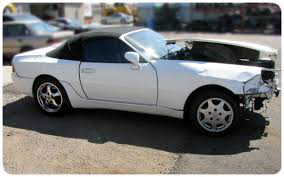

In [129]:
sample_img

In [130]:
sample_img_array = image.img_to_array(sample_img)

In [131]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [132]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

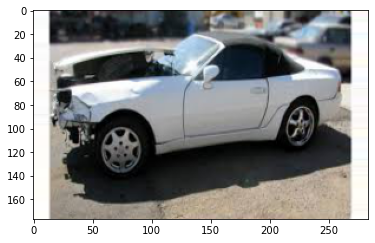

In [133]:
plt.imshow(samples[0])

### Generating images and saving in folders

We will be using Validation data in test data. For test data we will be not doing any data augmentation. So we will save these images directly to the folder.

In [134]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data_augmentation_2/data_1/train/damaged
data_augmentation_2/data_1/train/not_damaged
data_augmentation_2/data_1/test/damaged
data_augmentation_2/data_1/test/not_damaged


In [135]:
#Creating a function to create images
def create_images(name,save_path,image_path):
    #Generating a random number for rotation
    rotation = random.randint(-20,20)
    #Creating Image Data Generator:
    augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
    
    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)
    
    #Saving original image to folder.
    image_org.save(save_path+'/'+name)
    
    #Getting the numpy array of image.
    image_arr = image.img_to_array(image_org)
    
    #Expanding dimensions of image array
    image_arr = image_arr.reshape((1,) + image_arr.shape)
    
    #Using Flow to generate 4 new images for single image
    for arr,val in zip(augmentation.flow(image_arr, batch_size=1, save_format='jpeg'),range(1)):
        name = name.split('.')[0]
        img_save = image.array_to_img(arr[0], scale=False)
        img_save.save(save_path+'/'+name+'_aug_'+str(val)+'.jpeg')
    return paths

In [136]:
#Saving images
def save_images(name,save_path,image_path):
    
    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)
    
    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

In [137]:
for i in tqdm(train_damaged_list):
    create_images(i,train_save_path_1,'drive_data/data1a/training/00-damage')

100%|██████████| 920/920 [00:31<00:00, 28.89it/s]


In [138]:
for i in tqdm(train_not_damaged_list):
    create_images(i,train_save_path_2,'drive_data/data1a/training/01-whole')

100%|██████████| 920/920 [03:21<00:00,  4.57it/s]


In [139]:
for i in tqdm(test_damaged_list):
    save_images(i,test_save_path_1,'drive_data/data1a/validation/00-damage')

100%|██████████| 230/230 [00:01<00:00, 198.63it/s]


In [140]:
for i in tqdm(test_not_damaged_list):
    save_images(i,test_save_path_2,'drive_data/data1a/validation/01-whole')

100%|██████████| 230/230 [00:06<00:00, 36.09it/s]


### Data -2

### Visualization

In [141]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_front)

In [142]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [143]:
augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

In [144]:
sample_img = image.load_img('drive_data/data2a/training/00-front'+'/'+sample_file)

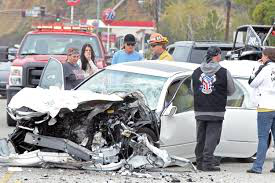

In [145]:
sample_img

In [146]:
sample_img_array = image.img_to_array(sample_img)

In [147]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [149]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

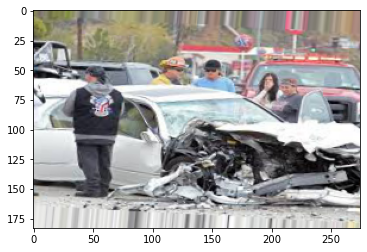

In [150]:
plt.imshow(samples[0])

### Generating images and saving in folders

We will be using Validation data in test data. For test data we will be not doing any data augmentation. So we will save these images directly to the folder.

In [151]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_2/data_2/train/front
data_augmentation_2/data_2/train/rear
data_augmentation_2/data_2/train/side
data_augmentation_2/data_2/test/front
data_augmentation_2/data_2/test/rear
data_augmentation_2/data_2/test/side


In [152]:
for i in tqdm(train_front):
    create_images(i,train_save_path_1,'drive_data/data2a/training/00-front')

100%|██████████| 425/425 [00:14<00:00, 28.94it/s]


In [153]:
for i in tqdm(train_rear):
    create_images(i,train_save_path_2,'drive_data/data2a/training/01-rear')

100%|██████████| 288/288 [00:10<00:00, 27.38it/s]


In [154]:
for i in tqdm(train_side):
    create_images(i,train_save_path_3,'drive_data/data2a/training/02-side')

100%|██████████| 272/272 [00:09<00:00, 29.35it/s]


In [155]:
for i in tqdm(test_front):
    save_images(i,test_save_path_1,'drive_data/data2a/validation/00-front')

100%|██████████| 73/73 [00:00<00:00, 118.37it/s]


In [156]:
for i in tqdm(test_rear):
    save_images(i,test_save_path_2,'drive_data/data2a/validation/01-rear')

100%|██████████| 58/58 [00:00<00:00, 166.30it/s]


In [157]:
for i in tqdm(test_side):
    save_images(i,test_save_path_3,'drive_data/data2a/validation/02-side')

100%|██████████| 48/48 [00:00<00:00, 116.02it/s]


### Data -3

### Visualization

In [158]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_severe)

In [159]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [160]:
augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

In [161]:
sample_img = image.load_img('drive_data/data3a/training/03-severe'+'/'+sample_file)

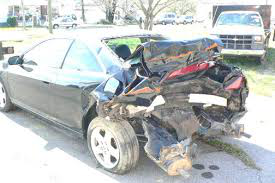

In [162]:
sample_img

In [163]:
sample_img_array = image.img_to_array(sample_img)

In [164]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [165]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

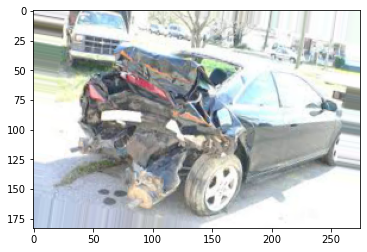

In [166]:
plt.imshow(samples[0])

### Generating images and saving in folders

We will be using Validation data in test data. For test data we will be not doing any data augmentation. So we will save these images directly to the folder.

In [167]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_2/data_3/train/minor
data_augmentation_2/data_3/train/moderate
data_augmentation_2/data_3/train/severe
data_augmentation_2/data_3/test/minor
data_augmentation_2/data_3/test/moderate
data_augmentation_2/data_3/test/severe


In [168]:
for i in tqdm(train_minor):
    create_images(i,train_save_path_1,'drive_data/data3a/training/01-minor')

100%|██████████| 278/278 [00:09<00:00, 28.59it/s]


In [169]:
for i in tqdm(train_moderate):
    create_images(i,train_save_path_2,'drive_data/data3a/training/02-moderate')

100%|██████████| 315/315 [00:10<00:00, 28.98it/s]


In [170]:
for i in tqdm(train_severe):
    create_images(i,train_save_path_3,'drive_data/data3a/training/03-severe')

100%|██████████| 386/386 [00:13<00:00, 28.90it/s]


In [171]:
for i in tqdm(test_minor):
    save_images(i,test_save_path_1,'drive_data/data3a/validation/01-minor')

100%|██████████| 48/48 [00:00<00:00, 146.98it/s]


In [172]:
for i in tqdm(test_moderate):
    save_images(i,test_save_path_2,'drive_data/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:00<00:00, 136.52it/s]


In [173]:
for i in tqdm(test_severe):
    save_images(i,test_save_path_3,'drive_data/data3a/validation/03-severe')

100%|██████████| 68/68 [00:00<00:00, 129.74it/s]


### Files Counts after Augmentation:

In [174]:
data_1_files = len(os.listdir('data_augmentation_2/data_1/train/damaged'))+len(os.listdir('data_augmentation_2/data_1/train/not_damaged'))

In [175]:
print('Number of files for all classes damaged, not damaged is ',data_1_files)

Number of files for all classes damaged, not damaged is  3680


In [176]:
data_2_files = len(os.listdir('data_augmentation_2/data_2/train/front'))+len(os.listdir('data_augmentation_2/data_2/train/rear'))+len(os.listdir('data_augmentation_2/data_2/train/side'))

In [177]:
print('Number of files for all classes front,rear,side is ',data_2_files)

Number of files for all classes front,rear,side is  1970


In [178]:
data_3_files = len(os.listdir('data_augmentation_2/data_3/train/minor'))+len(os.listdir('data_augmentation_2/data_3/train/moderate'))+len(os.listdir('data_augmentation_2/data_3/train/severe'))

In [179]:
print('Number of files for all classes minor,moderate,severe is ',data_3_files)

Number of files for all classes minor,moderate,severe is  1958


# Conclusion

I created three types of data.
1. Original data
2. Original data with augmentation-1
3. Original data with augmentation-2

<p>Since the image shapes we have are different we will use (256,256,3) as default shape when training the CNN.<p>